In [1]:
import cv2
import easyocr
import numpy as np

reader = easyocr.Reader(
    ['en'],
    gpu=True,
    recog_network='best_norm_ED',
    user_network_directory='../models',
    model_storage_directory='../models',
) # this needs to run only once to load the model into memory


# Read image as numpy array
image = cv2.imread('../examples/kz_book_simple.jpeg')

# Rotate the image by 270 degrees
# image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Convert the image from BGR to RGB (because OpenCV loads images in BGR format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Using CPU. Note: This module is much faster with a GPU.


In [2]:
results = reader.readtext(image = image)

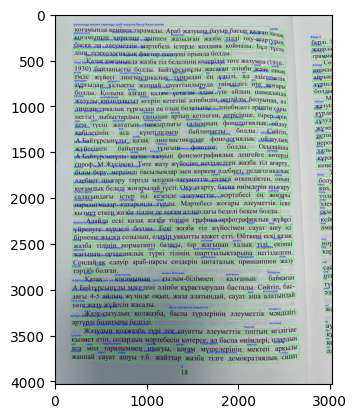

In [3]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# Load custom font
font_path = "./Ubuntu-Regular.ttf"
font = ImageFont.truetype(font_path, 32)

# Display the results
for (bbox, text, prob) in results:
    # Get the bounding box coordinates
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = (int(top_left[0]), int(top_left[1]))
    bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

    # Draw the bounding box on the image
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

    # Convert the OpenCV image to a PIL image, draw the text, then convert back to an OpenCV image
    image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(image_pil)
    draw.text((top_left[0], top_left[1] - 40), text, font=font, fill=(0, 0, 255))
    image = cv2.cvtColor(np.array(image_pil), cv2.COLOR_RGB2BGR)

# Save image
cv2.imwrite('./model_output.jpg', image)

# Show the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# results


In [4]:
results

[([[200, 135], [2330, 135], [2330, 243], [200, 243]],
  'қоғамында кеңінен тарамады Араб жазуына бауыр басып қалған',
  0.8134216082461898),
 ([[205, 227], [591, 227], [591, 292], [205, 292]],
  'қоғамының',
  0.7054357051957093),
 ([[622, 216], [1226, 216], [1226, 320], [622, 320]],
  'кирилше әріпен',
  0.8739343573808654),
 ([[1259, 248], [1575, 248], [1575, 303], [1259, 303]],
  'жазылған',
  0.9999941148240467),
 ([[1609, 230], [1814, 230], [1814, 302], [1609, 302]],
  'жазба',
  0.9654479829564859),
 ([[1843, 227], [2012, 227], [2012, 305], [1843, 305]],
  'тілді',
  0.9941727839405635),
 ([[200, 295], [401, 295], [401, 376], [200, 376]], 'басқа', 1.0),
 ([[2781, 271], [3024, 271], [3024, 349], [2781, 349]],
  'берді З',
  0.9999850341118515),
 ([[419, 301], [1825, 301], [1825, 411], [419, 411]],
  'да әлеуметтік мәртебелі істерде қолдана',
  0.6125054153536772),
 ([[1845, 310], [2158, 310], [2158, 388], [1845, 388]],
  'қоймады',
  0.4575017658430743),
 ([[2328, 346], [2502, 346

In [ ]:
reader.readtext(image = image, paragraph=True)